<a href="https://colab.research.google.com/github/Joohhnnyyy/test-sets/blob/main/new_test_set1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost
!pip install xgboost
!pip install visualkeras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 16.3 MB/s eta 0:00:00


In [2]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

from ipywidgets import interact


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier, Perceptron, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import (
    ExtraTreesClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier,
    VotingClassifier, StackingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier,
    IsolationForest)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder


from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation, LabelSpreading


from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


import joblib
import pickle
import os
import zipfile

In [4]:
df = pd.read_csv("new_test_set.csv")

In [5]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [6]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [7]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [8]:
df['Soil Type'].unique()

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey'], dtype=object)

<Axes: xlabel='Soil Type', ylabel='count'>

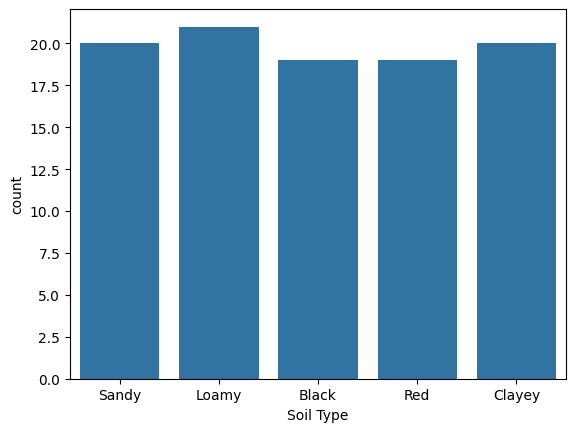

In [9]:
sns.countplot(x='Soil Type', data = df)

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


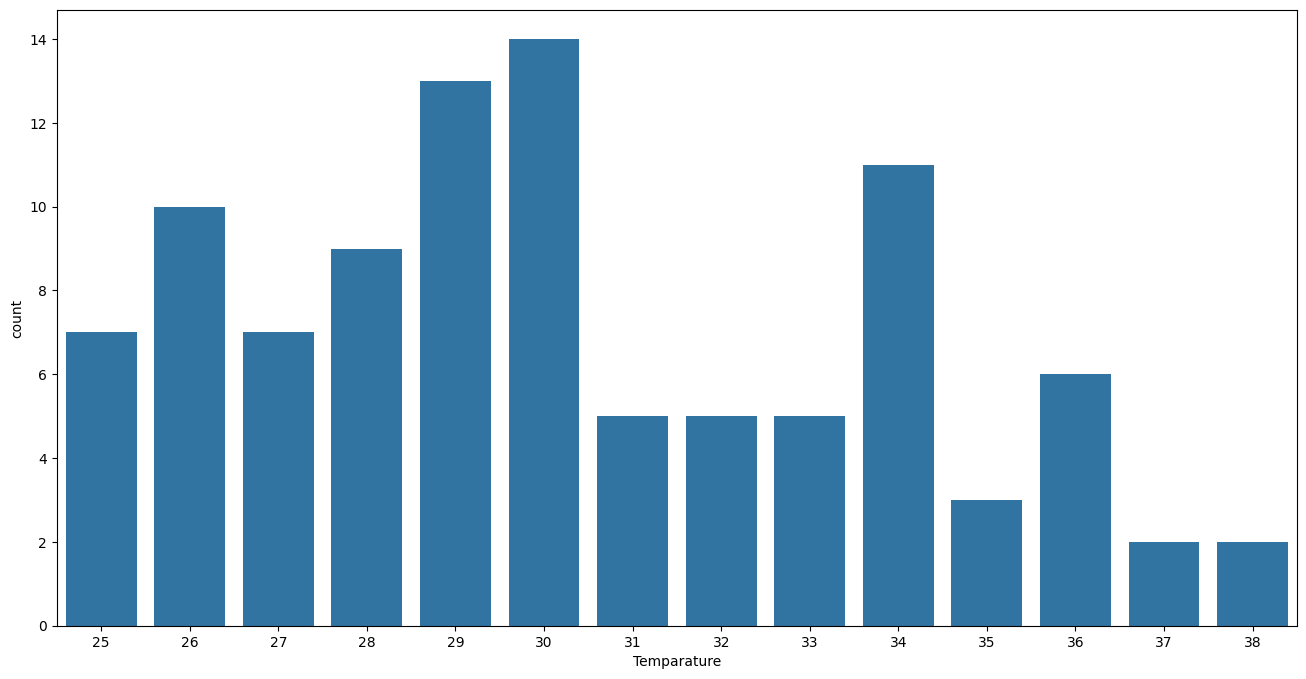

In [12]:
print(df.columns)


plt.figure(figsize=(16, 8))
sns.countplot(x='Temparature', data=df)
plt.show()

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


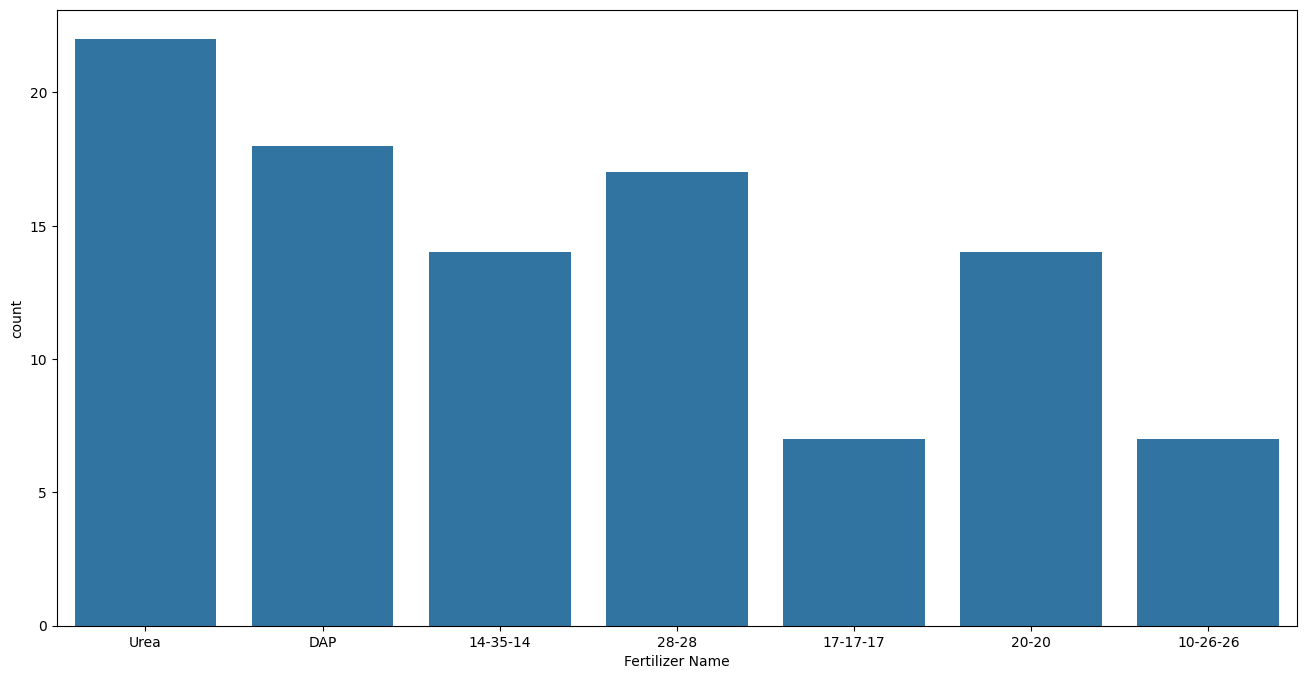

In [14]:

print(df.columns)


plt.figure(figsize=(16, 8))
sns.countplot(x='Fertilizer Name', data=df)
plt.show()

In [15]:
def plot_conti(x):
    fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Histogram')
    sns.histplot(x,ax=axes[0])
    axes[1].set_title('Checking Outliers')
    sns.boxplot(x,ax=axes[1])
    axes[2].set_title('Relation with output variable')
    sns.boxplot(y = x,x = df['Fertilizer Name'])

def plot_cato(x):
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5),tight_layout=True)
    axes[0].set_title('Count Plot')
    sns.countplot(x,ax=axes[0])
    axes[1].set_title('Relation with output variable')
    sns.countplot(x = x,hue = df['Fertilizer Name'], ax=axes[1])

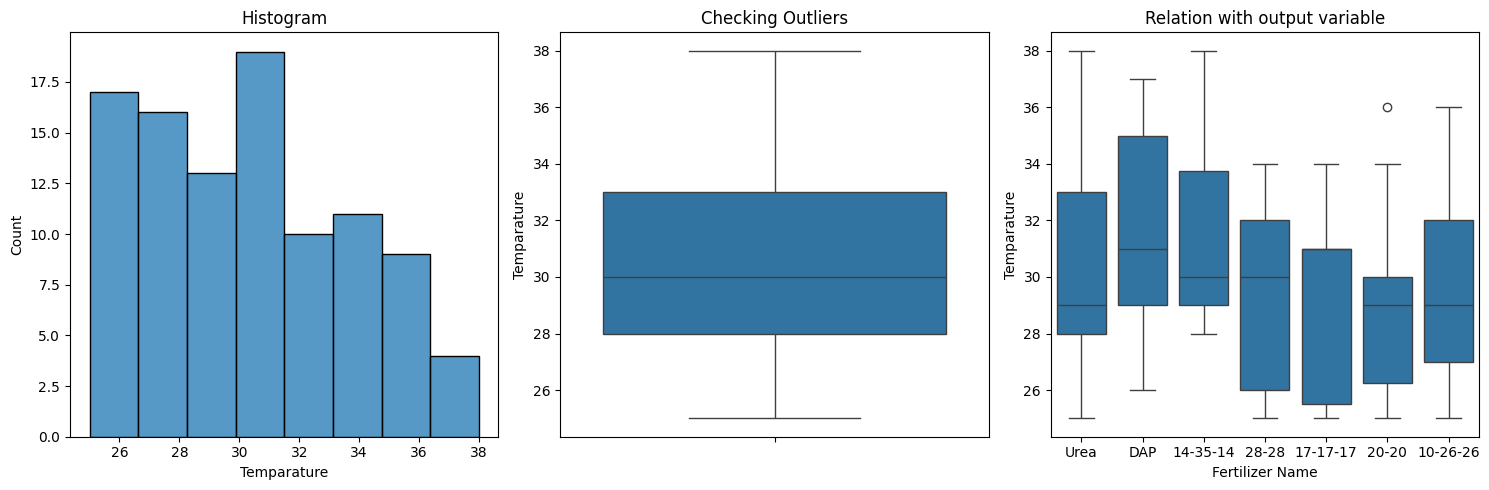

In [17]:
plot_conti(df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

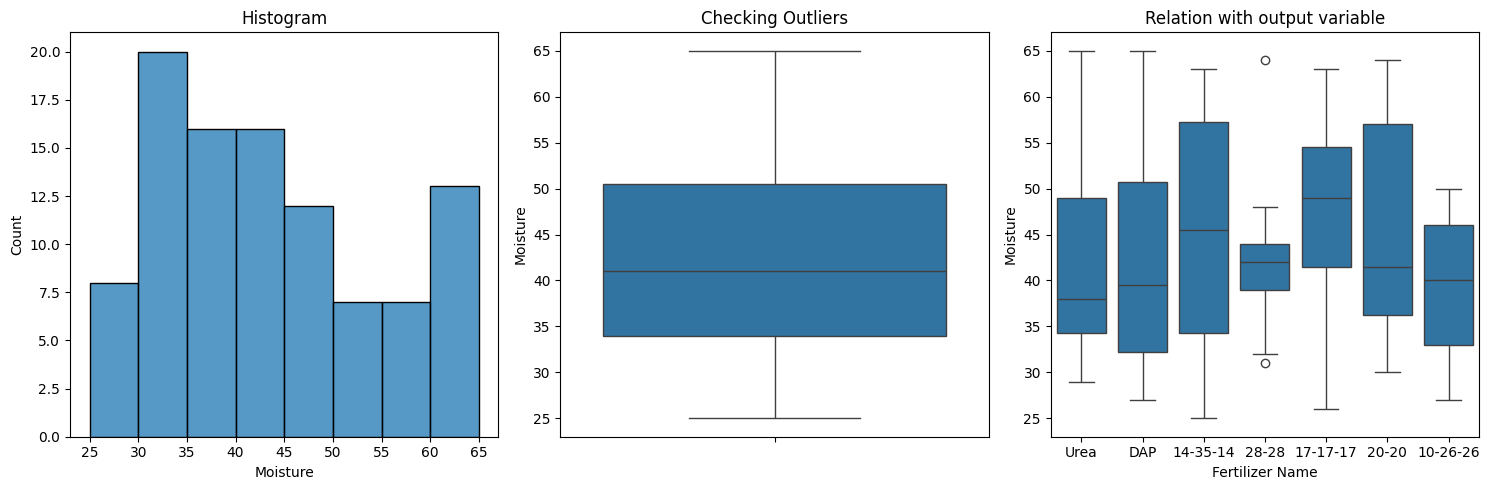

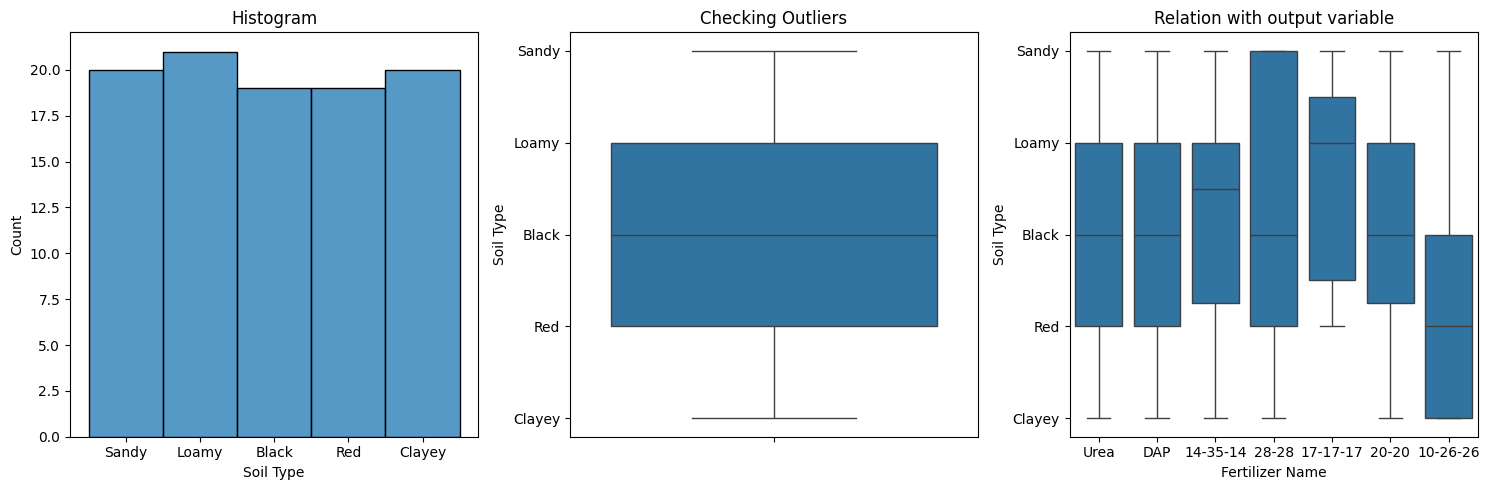

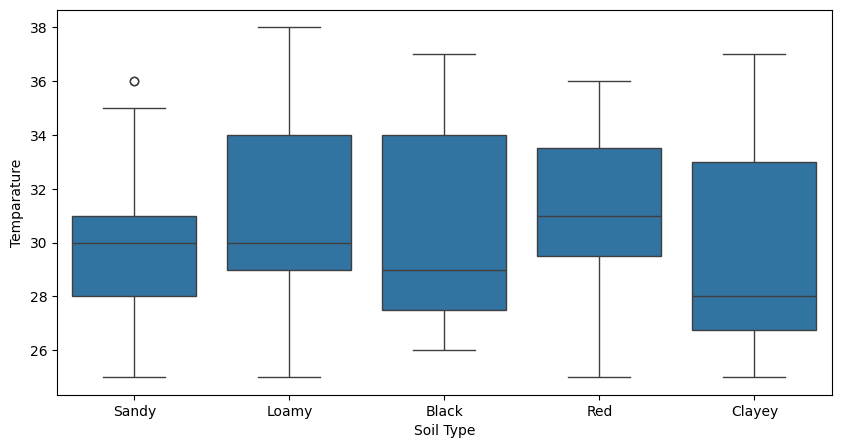

In [18]:
plot_conti(df['Moisture'])
plot_conti(df['Soil Type'])
plt.figure(figsize=(10,5))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'])

<Axes: xlabel='Soil Type', ylabel='Temparature'>

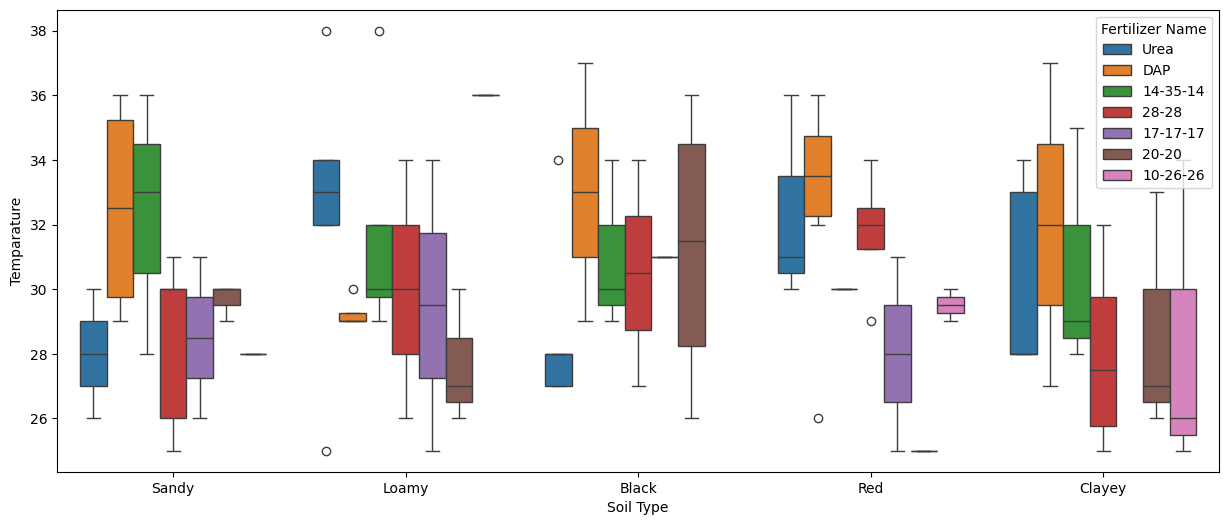

In [20]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Soil Type'],y=df['Temparature'],hue=df['Fertilizer Name'])

<Axes: xlabel='Crop Type', ylabel='Temparature'>

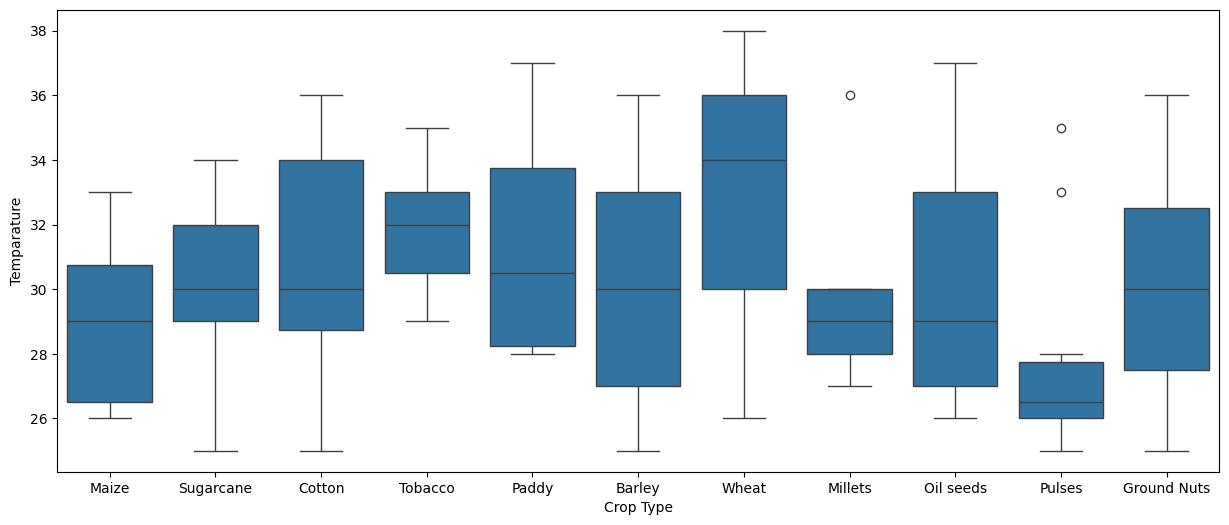

In [22]:
plt.figure(figsize=(15,6))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])

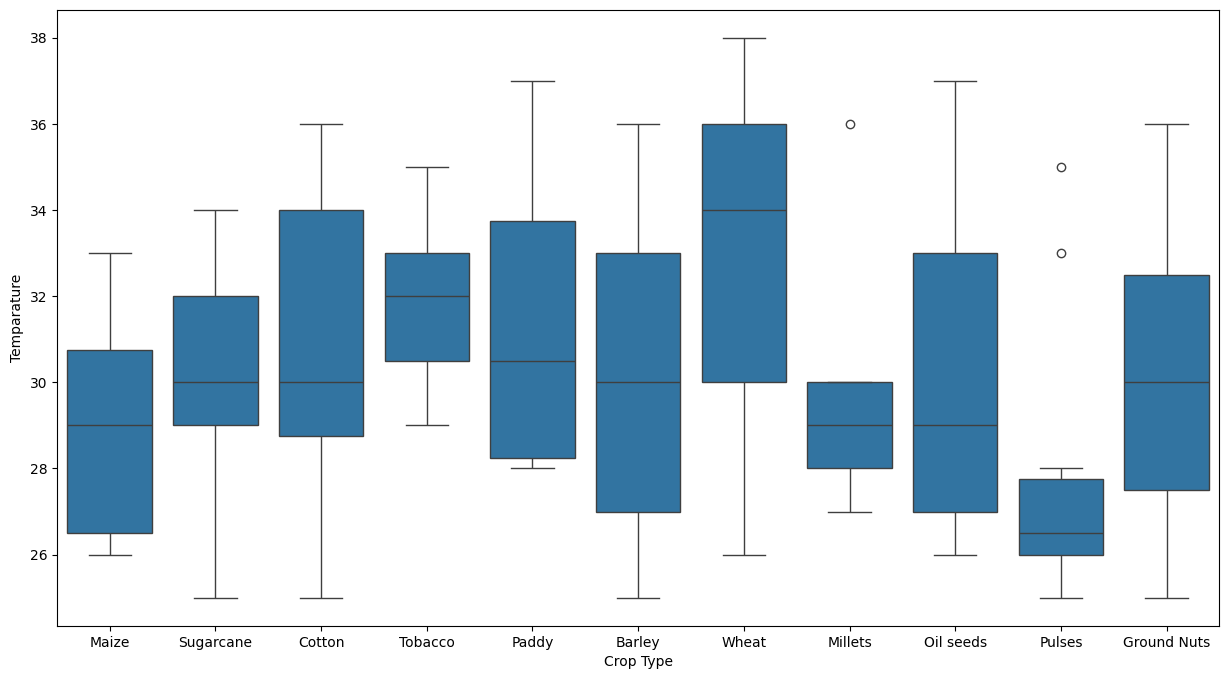

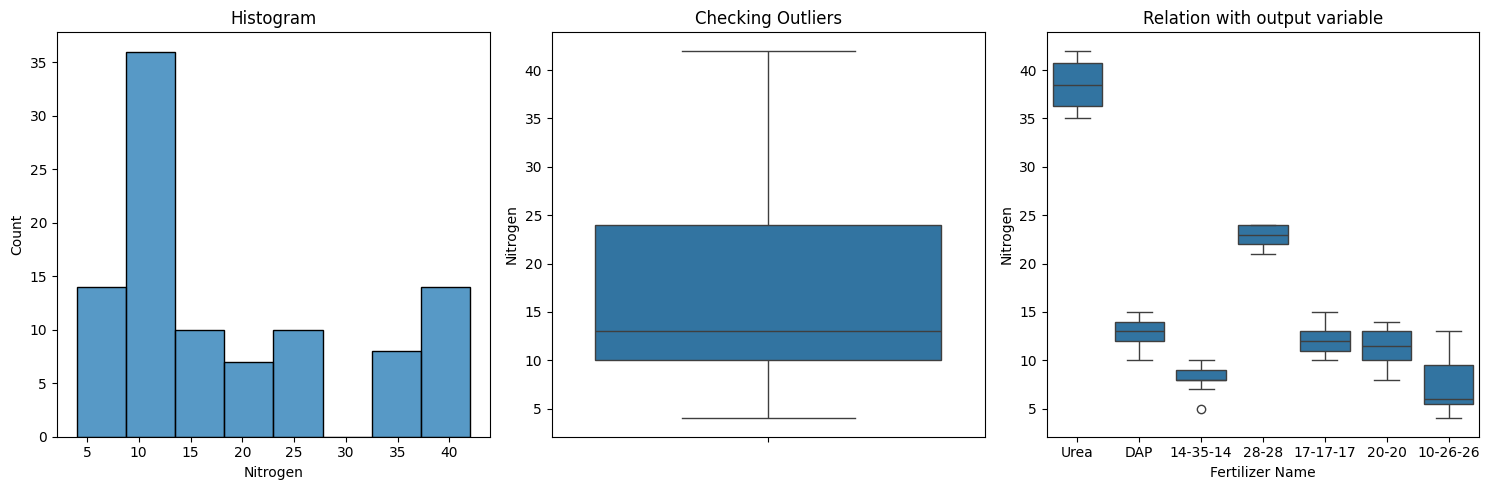

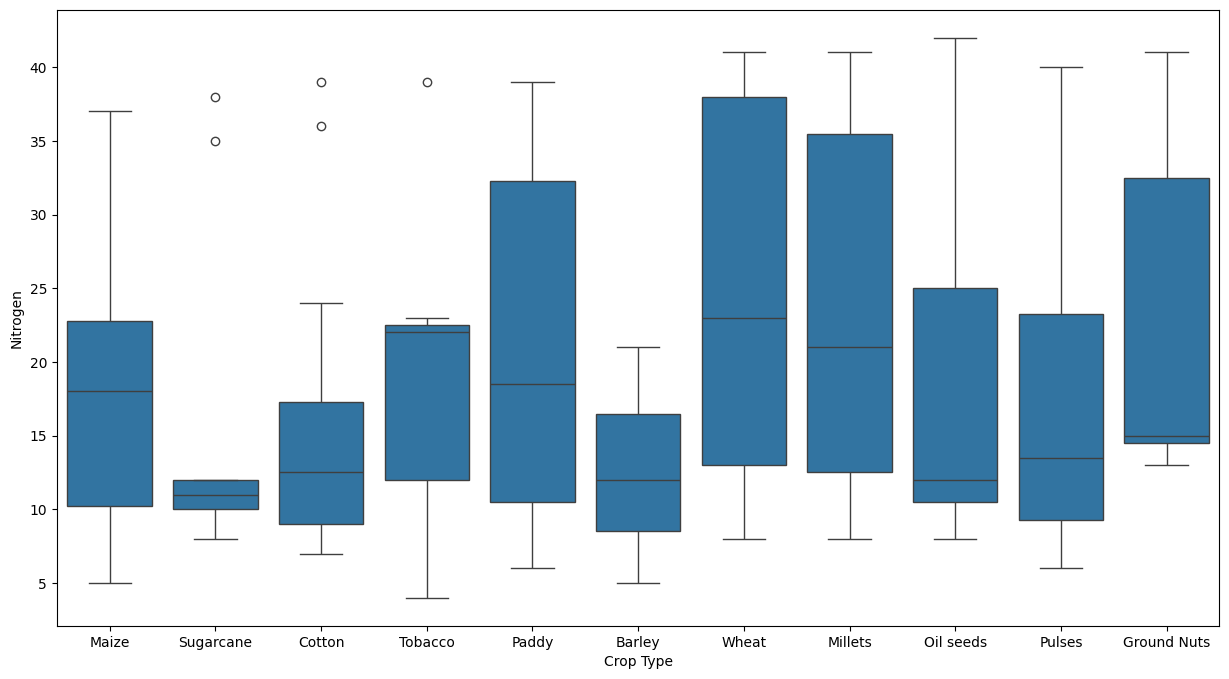

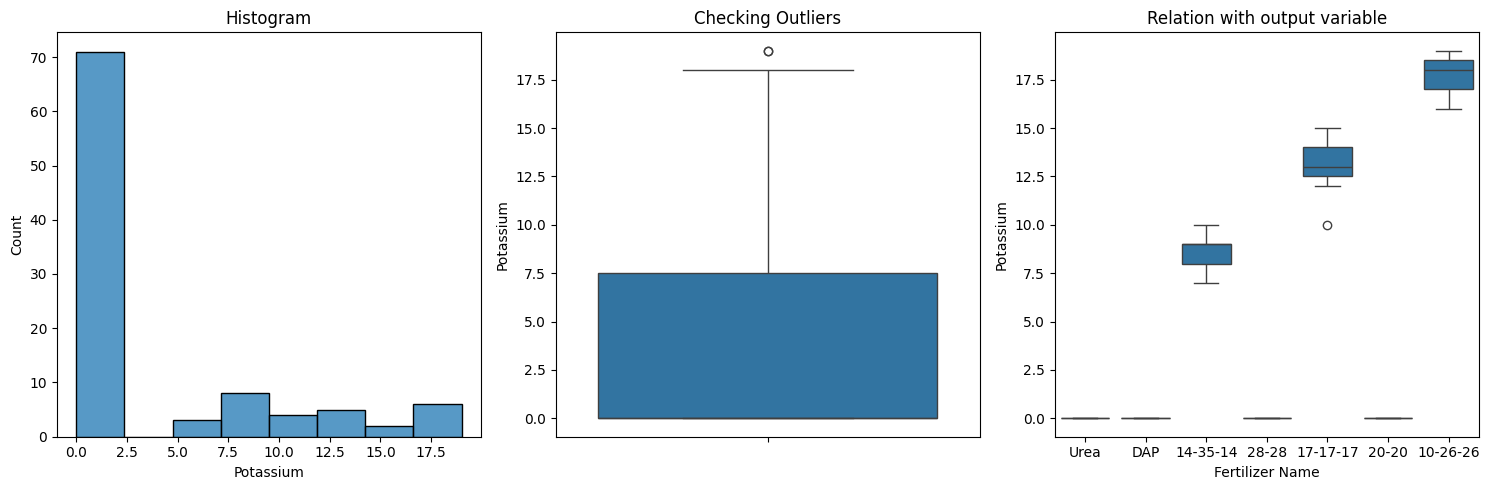

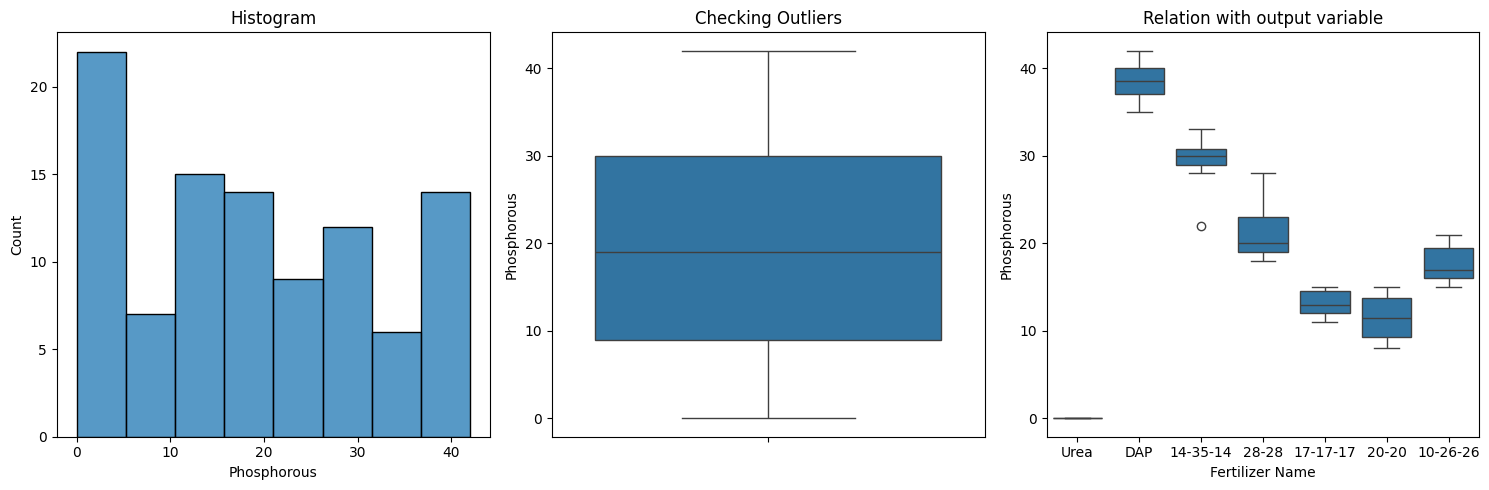

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Temparature'])
plot_conti(df['Nitrogen'])
plt.figure(figsize=(15,8))
sns.boxplot(x=df['Crop Type'],y=df['Nitrogen'])
plot_conti(df['Potassium'])
plot_conti(df['Phosphorous'])

In [28]:
y = df['Fertilizer Name'].copy()
X = df.drop('Fertilizer Name', axis=1).copy()

In [29]:
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), [0, 1, 3, 4])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [30]:
X[0]

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., 38., 37.,  0.,  0.])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

X = df.drop('Fertilizer Name', axis=1)

categorical_features = ['Soil Type', 'Crop Type']
numerical_features = X.select_dtypes(include=['number']).columns.tolist()


numerical_pipeline = Pipeline([
    ('scaler', StandardScaler()),
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(sparse_output=False, handle_unknown='ignore')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features),
    ])

X_processed = preprocessor.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, train_size=0.8, shuffle=True, random_state=42)

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_train[0]


array([ 0.76462082,  0.80219471,  0.71373089, -1.15292671,  0.91259936,
        0.80677787, -0.48412292, -0.50395263, -0.54321448, -0.48412292,
        2.06559112, -0.25993762, -0.33567254, -0.31180478,  4.33012702,
       -0.38069349, -0.25993762, -0.33567254, -0.33567254, -0.42320737,
       -0.23094011, -0.33567254])

In [35]:
def evaluate_and_save_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} classification report")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    model_path = os.path.join('all_models', f'{model_name}_model.pkl')
    with open(model_path, 'wb') as file:
        pickle.dump(model, file)

    return acc

In [36]:
!pip install --upgrade scikit-learn

ExtraTreesClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      0.80      0.89         5
         DAP       0.83      1.00      0.91         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.69      0.69      0.69        20
weighted avg       0.91      0.90      0.90        20



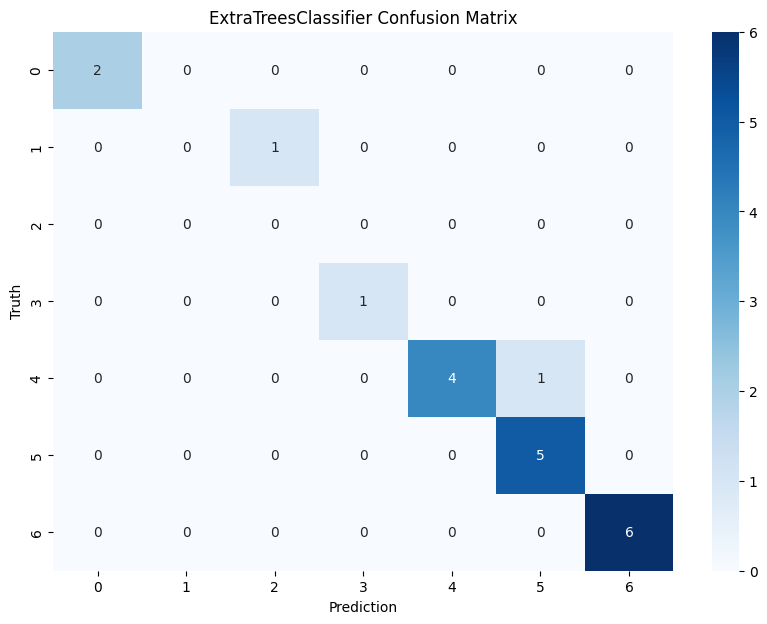

LinearDiscriminantAnalysis classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



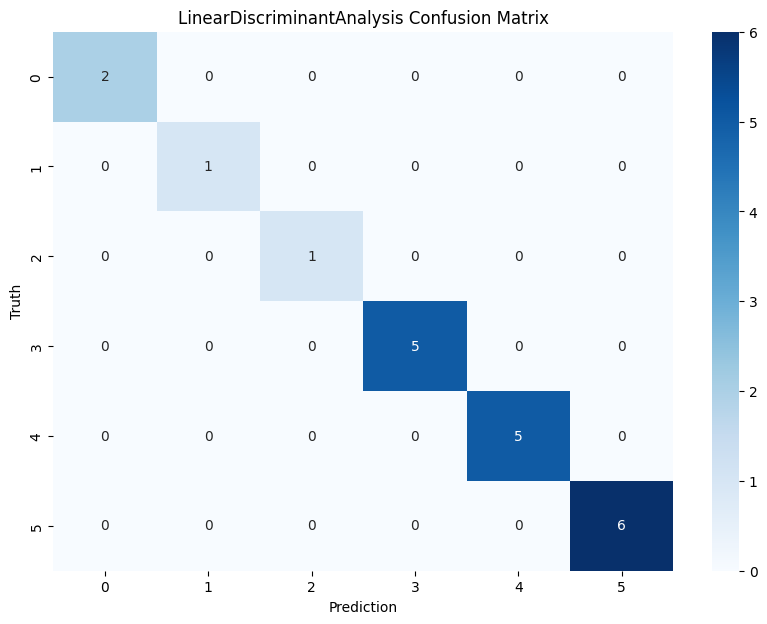

QuadraticDiscriminantAnalysis classification report
              precision    recall  f1-score   support

    10-26-26       0.25      1.00      0.40         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.14      1.00      0.25         1
       28-28       1.00      0.40      0.57         5
         DAP       0.00      0.00      0.00         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.30        20
   macro avg       0.34      0.37      0.22        20
weighted avg       0.58      0.30      0.28        20



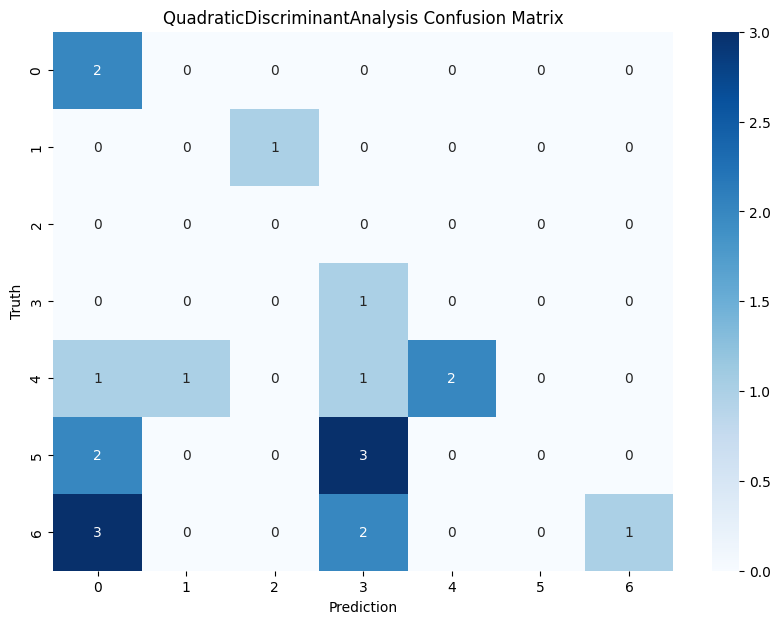

RidgeClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
       20-20       1.00      1.00      1.00         1
       28-28       0.75      0.60      0.67         5
         DAP       0.67      0.80      0.73         5
        Urea       0.86      1.00      0.92         6

    accuracy                           0.75        20
   macro avg       0.71      0.65      0.66        20
weighted avg       0.76      0.75      0.74        20



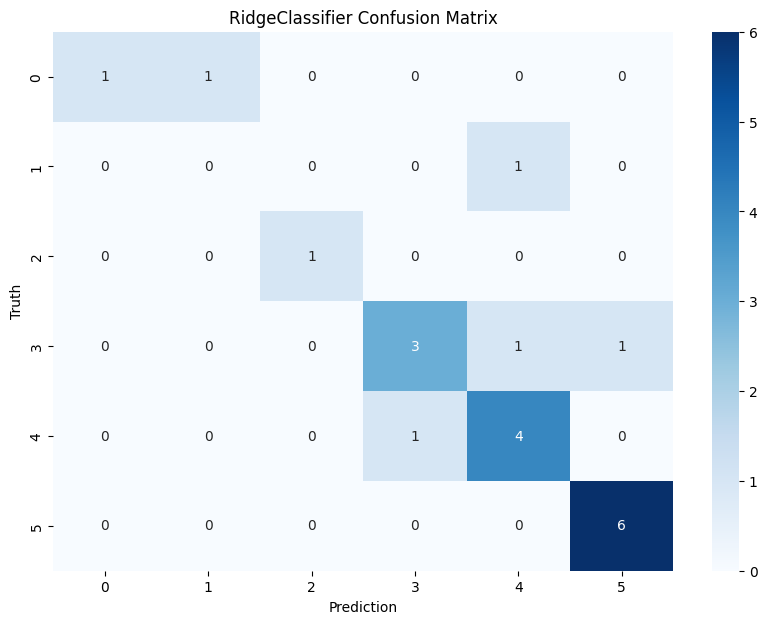

PassiveAggressiveClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.60      0.60      0.60         5
         DAP       0.80      0.80      0.80         5
        Urea       0.83      0.83      0.83         6

    accuracy                           0.75        20
   macro avg       0.60      0.60      0.60        20
weighted avg       0.75      0.75      0.75        20



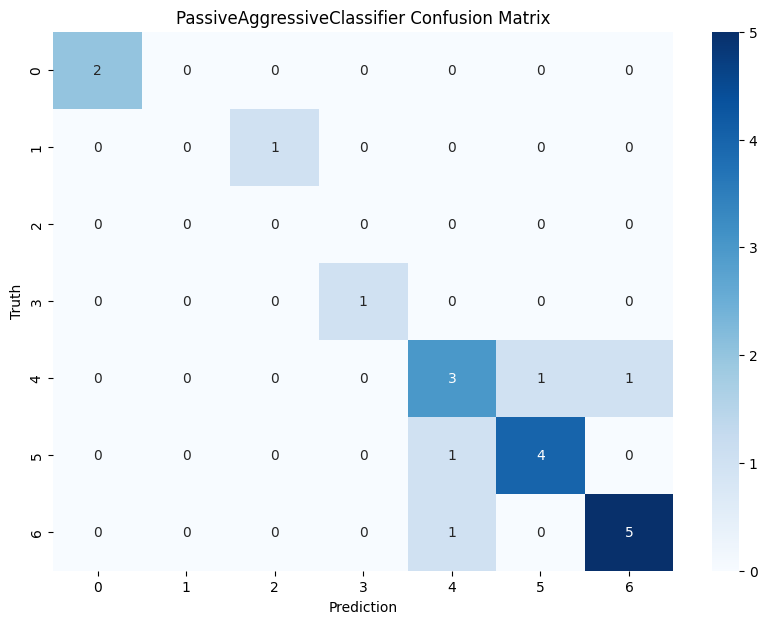

Perceptron classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.67      0.80      0.73         5
         DAP       0.80      0.80      0.80         5
        Urea       0.83      0.83      0.83         6

    accuracy                           0.75        20
   macro avg       0.61      0.56      0.58        20
weighted avg       0.77      0.75      0.75        20



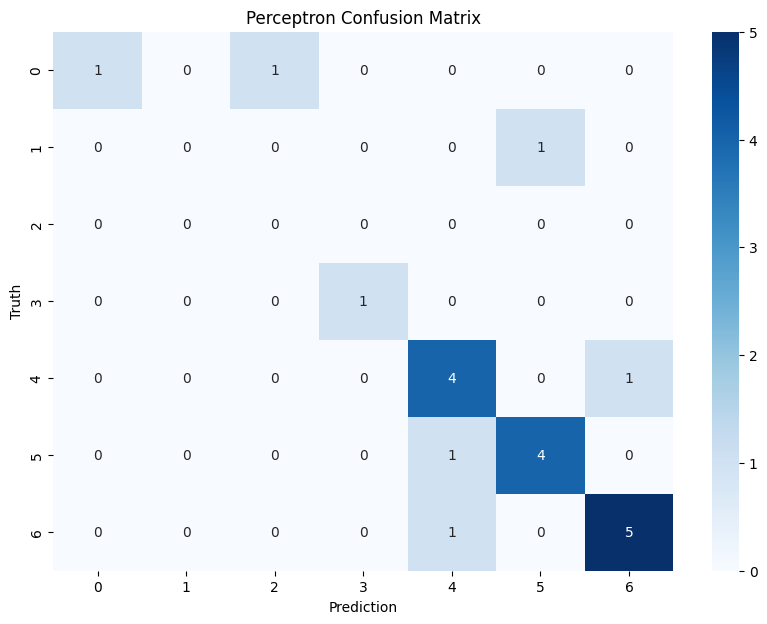

BaggingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



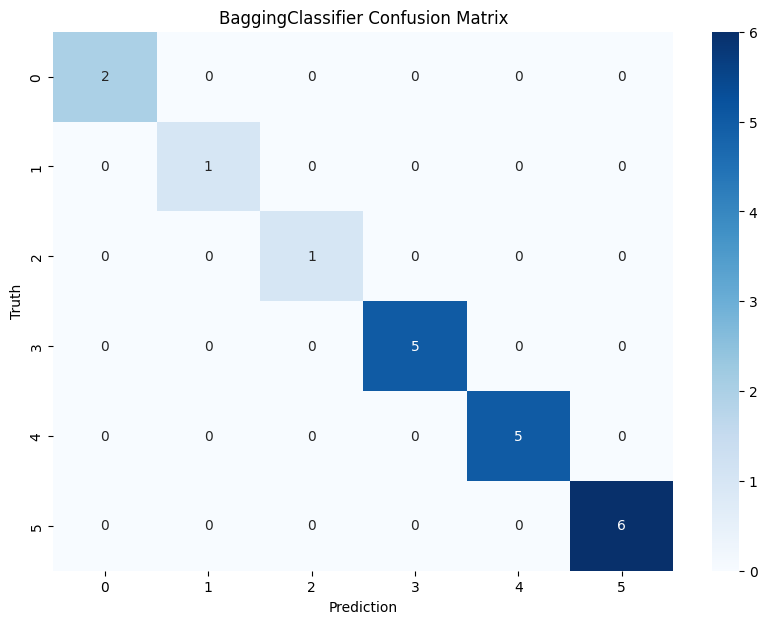

HistGradientBoostingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



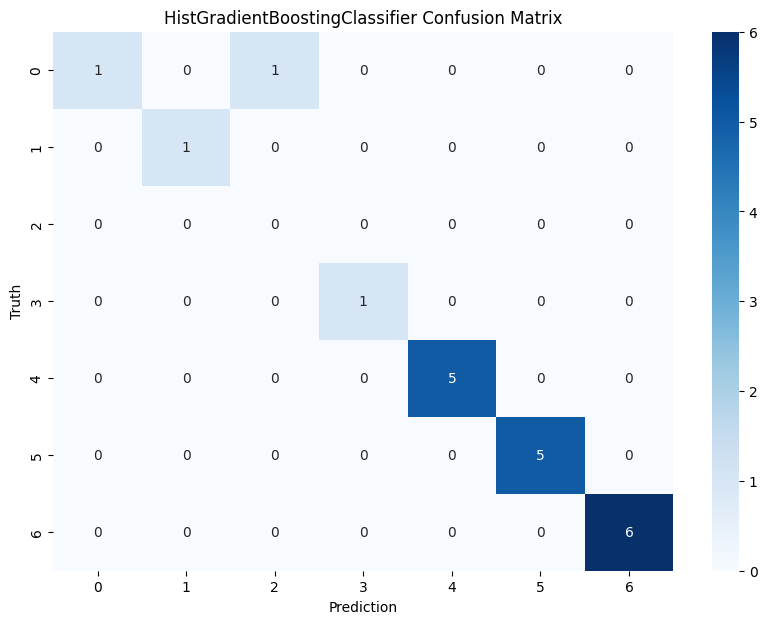

SGDClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.75      0.60      0.67         5
         DAP       0.50      0.60      0.55         5
        Urea       1.00      0.83      0.91         6

    accuracy                           0.70        20
   macro avg       0.61      0.58      0.59        20
weighted avg       0.76      0.70      0.73        20



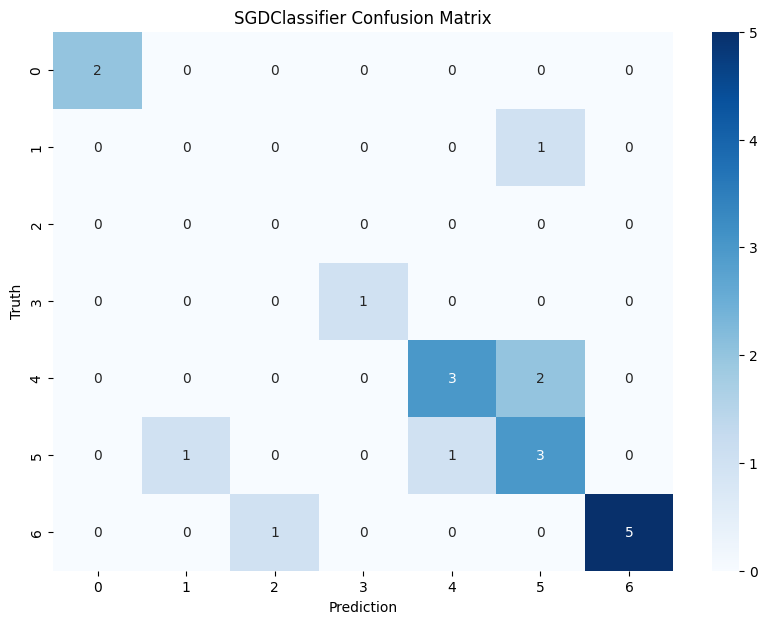

NearestCentroid classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         1
       28-28       0.57      0.80      0.67         5
         DAP       0.60      0.60      0.60         5
        Urea       1.00      0.50      0.67         6

    accuracy                           0.55        20
   macro avg       0.53      0.40      0.43        20
weighted avg       0.69      0.55      0.58        20



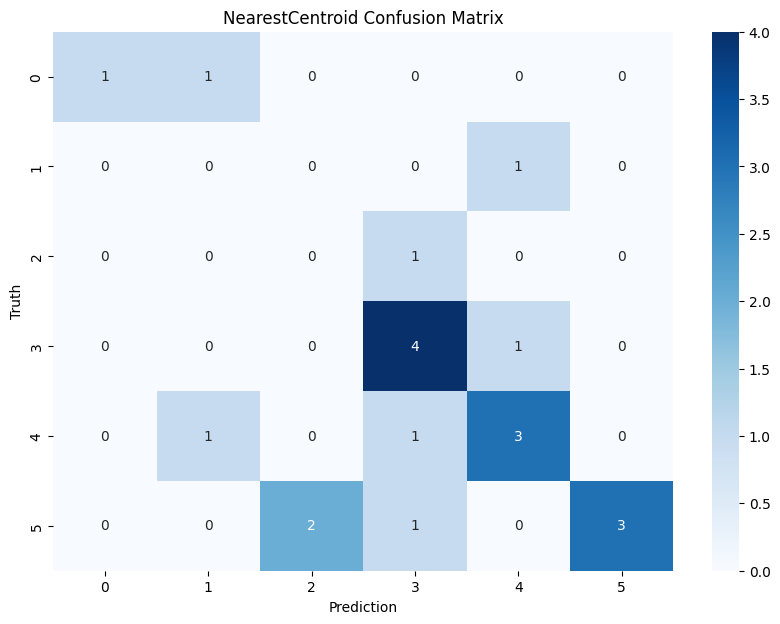

K-NeighborsClassifier classification report
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         1
       28-28       0.20      0.20      0.20         5
         DAP       0.00      0.00      0.00         5
        Urea       0.50      0.17      0.25         6

    accuracy                           0.10        20
   macro avg       0.12      0.06      0.07        20
weighted avg       0.20      0.10      0.12        20



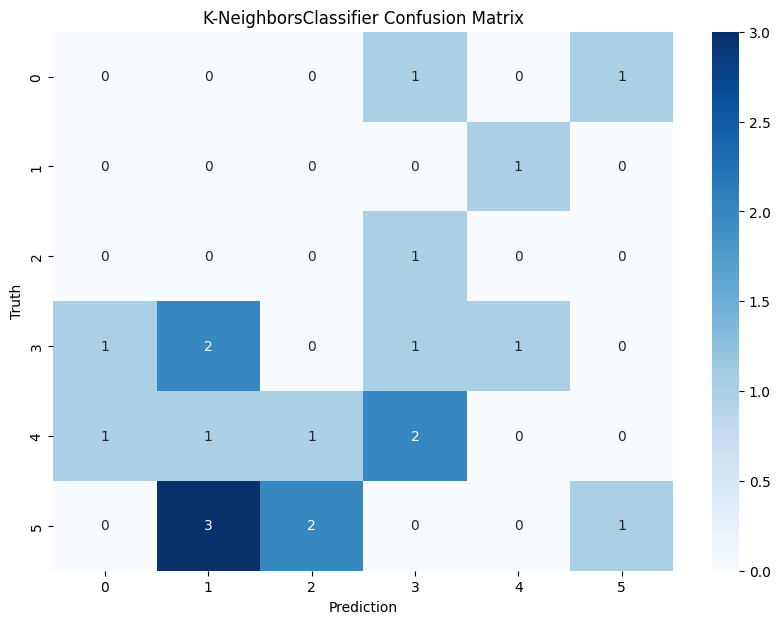

GradientBoostingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      0.80      0.89         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20



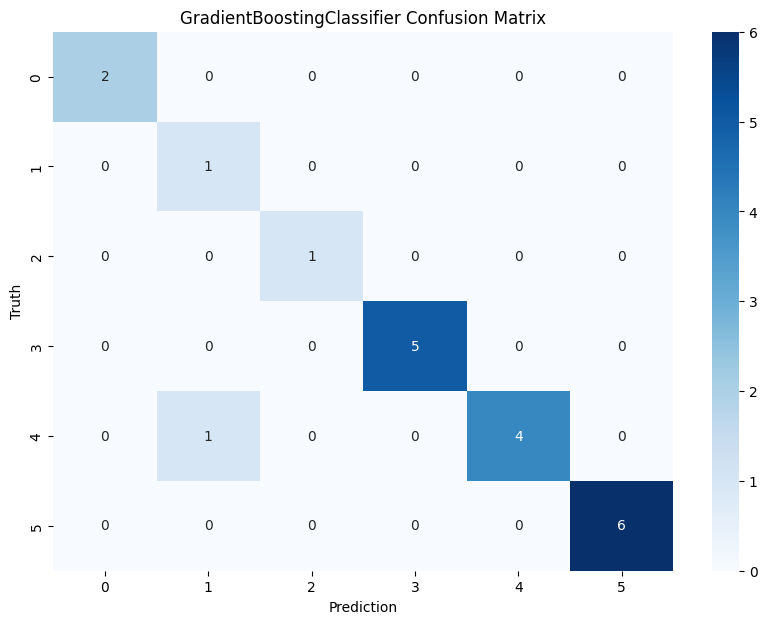

RandomForestClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       1.00      1.00      1.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



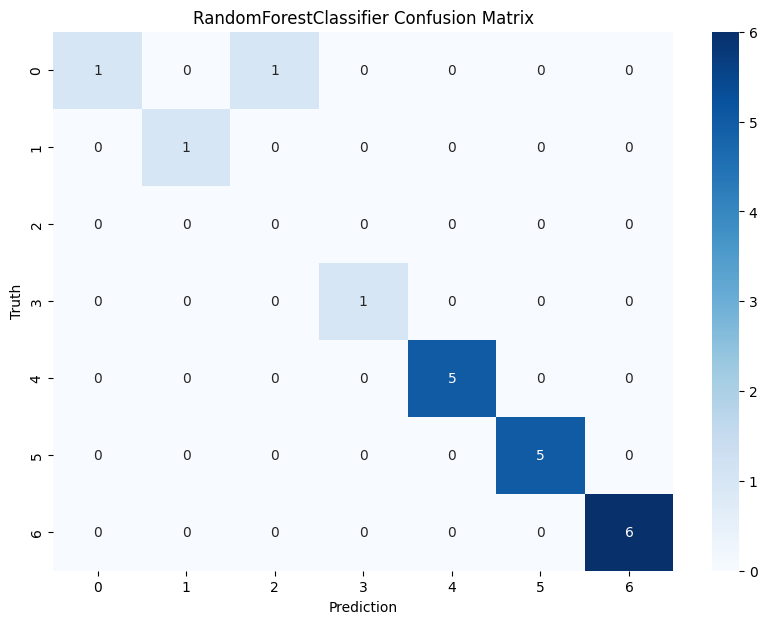

LogisticRegression classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       0.75      0.60      0.67         5
         DAP       0.80      0.80      0.80         5
        Urea       0.86      1.00      0.92         6

    accuracy                           0.75        20
   macro avg       0.63      0.56      0.58        20
weighted avg       0.79      0.75      0.76        20



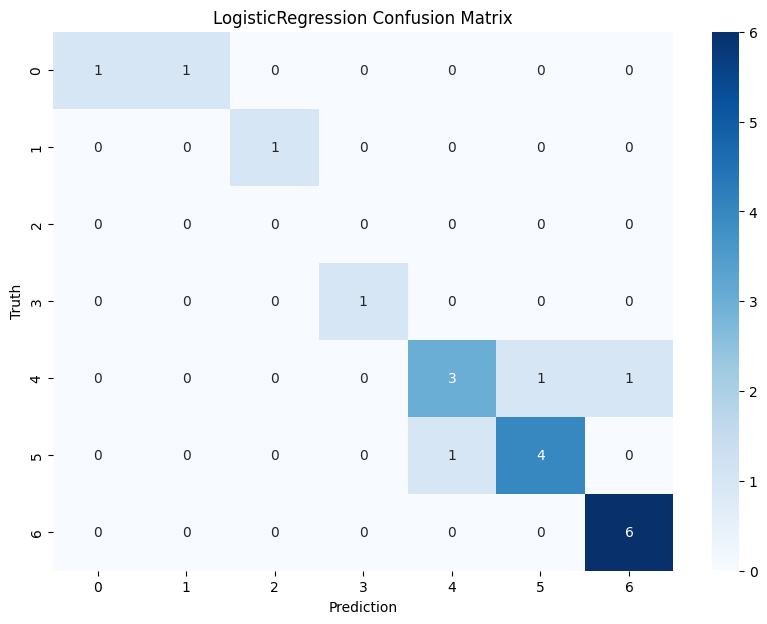

SupportVectorClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         1
       28-28       0.20      0.20      0.20         5
         DAP       0.25      0.20      0.22         5
        Urea       1.00      0.33      0.50         6

    accuracy                           0.25        20
   macro avg       0.41      0.21      0.26        20
weighted avg       0.51      0.25      0.32        20



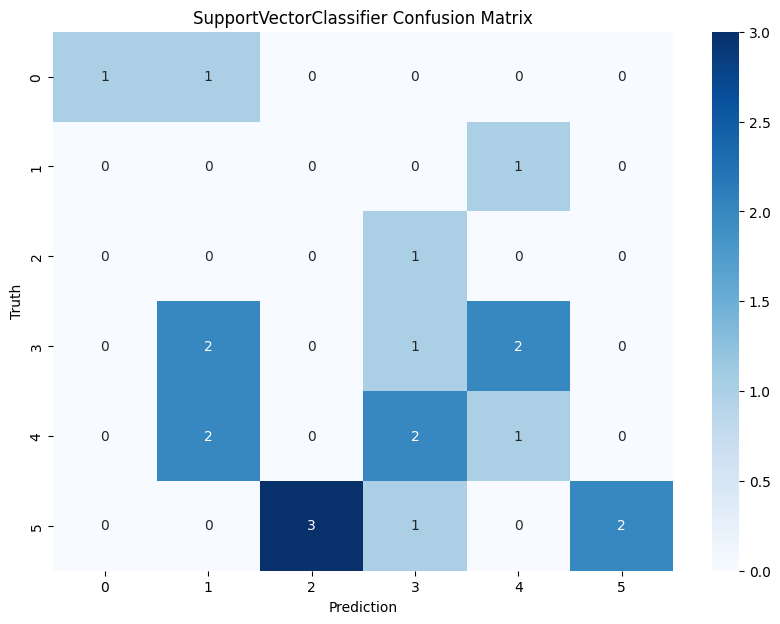

DecisionTreeClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



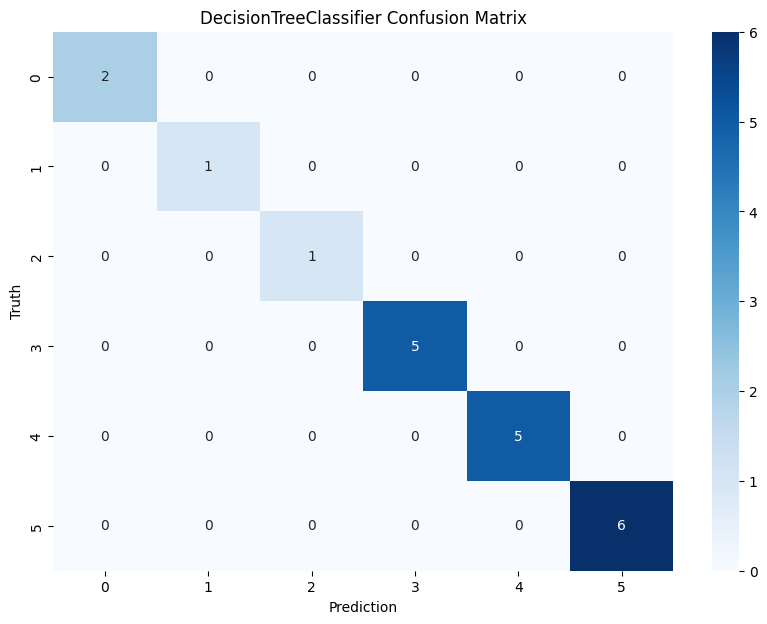

AdaBoostClassifier classification report
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       0.11      1.00      0.20         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.00      0.00      0.00         1
       28-28       0.00      0.00      0.00         5
         DAP       0.00      0.00      0.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.35        20
   macro avg       0.16      0.29      0.17        20
weighted avg       0.31      0.35      0.31        20



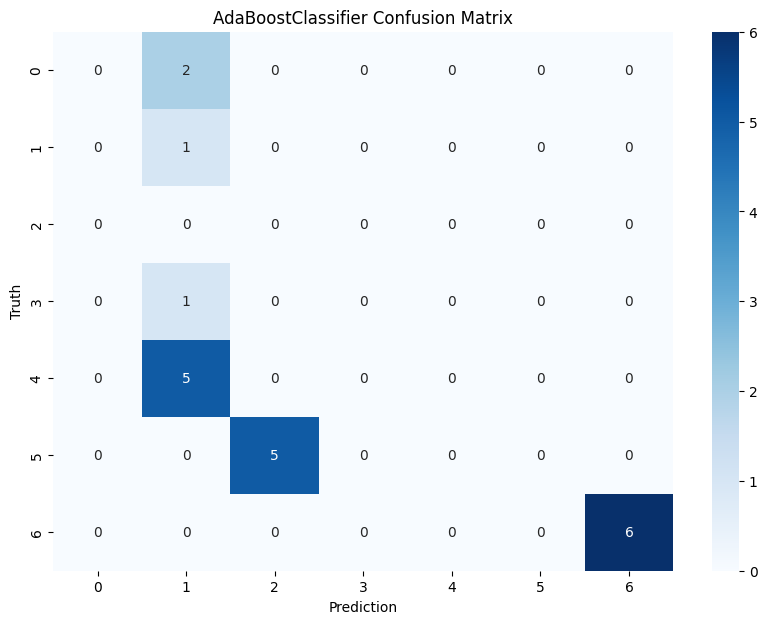

CatBoostClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      1.00      1.00         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



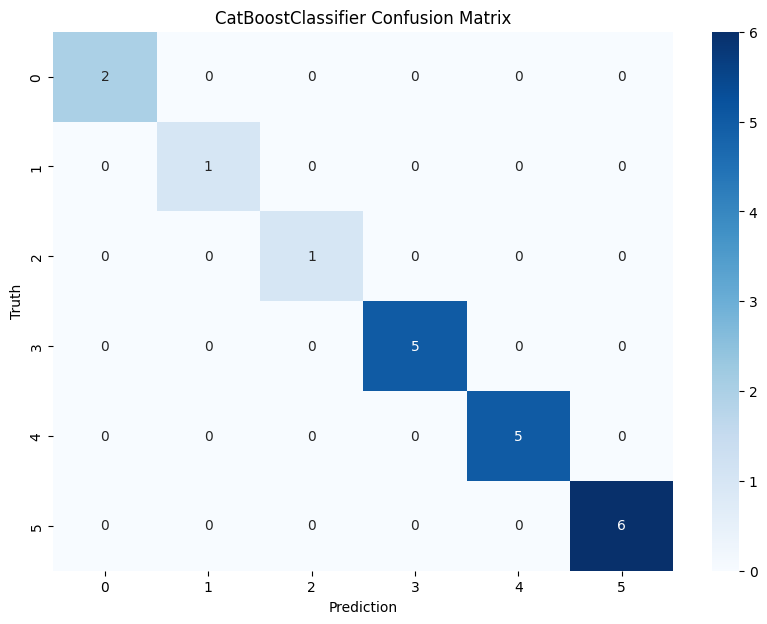

ExtraTreeClassifier classification report
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         2
    14-35-14       0.50      1.00      0.67         1
       20-20       0.50      1.00      0.67         1
       28-28       0.80      0.80      0.80         5
         DAP       1.00      1.00      1.00         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.85        20
   macro avg       0.63      0.80      0.69        20
weighted avg       0.80      0.85      0.82        20



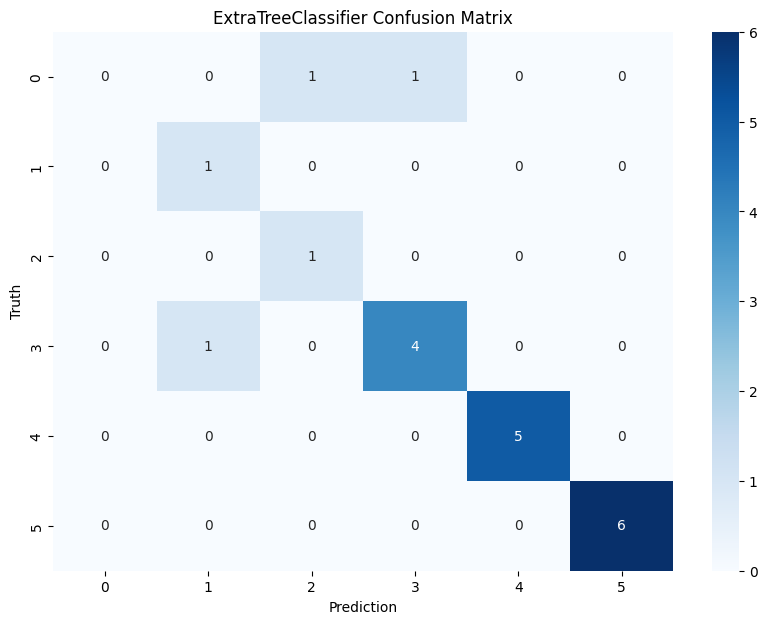

LabelPropagation classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.33      1.00      0.50         1
       28-28       0.50      0.60      0.55         5
         DAP       0.40      0.40      0.40         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.40        20
   macro avg       0.46      0.38      0.34        20
weighted avg       0.64      0.40      0.41        20



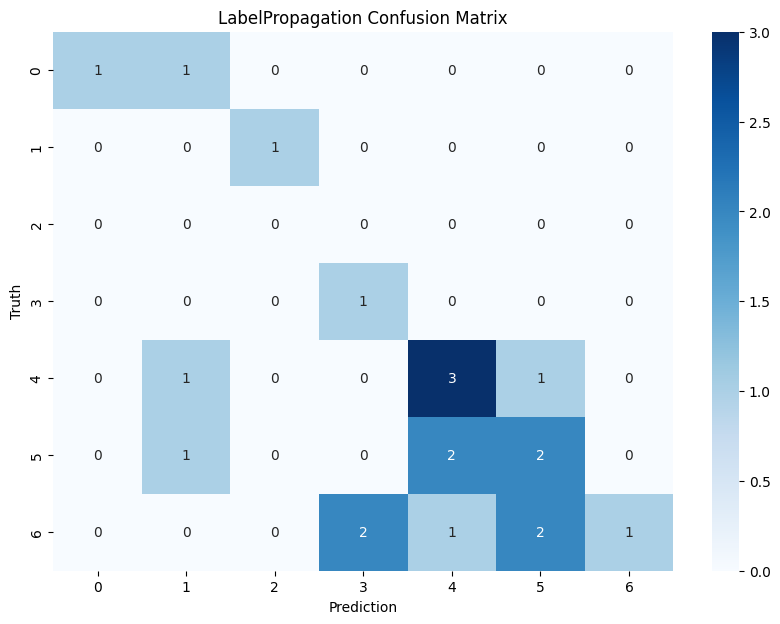

LabelSpreading classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.33      1.00      0.50         1
       28-28       0.50      0.60      0.55         5
         DAP       0.40      0.40      0.40         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.40        20
   macro avg       0.46      0.38      0.34        20
weighted avg       0.64      0.40      0.41        20



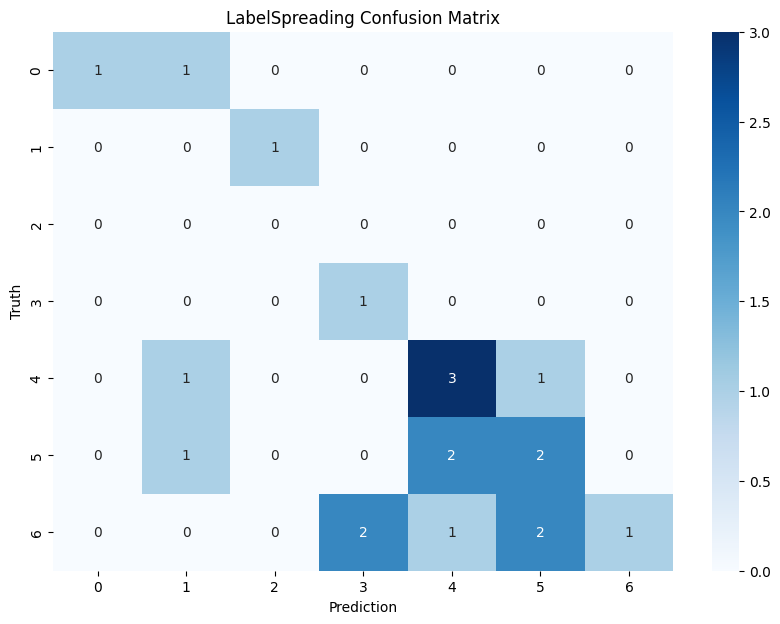

GaussianProcessClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.33      1.00      0.50         1
       28-28       0.50      0.60      0.55         5
         DAP       0.40      0.40      0.40         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.40        20
   macro avg       0.46      0.38      0.34        20
weighted avg       0.64      0.40      0.41        20



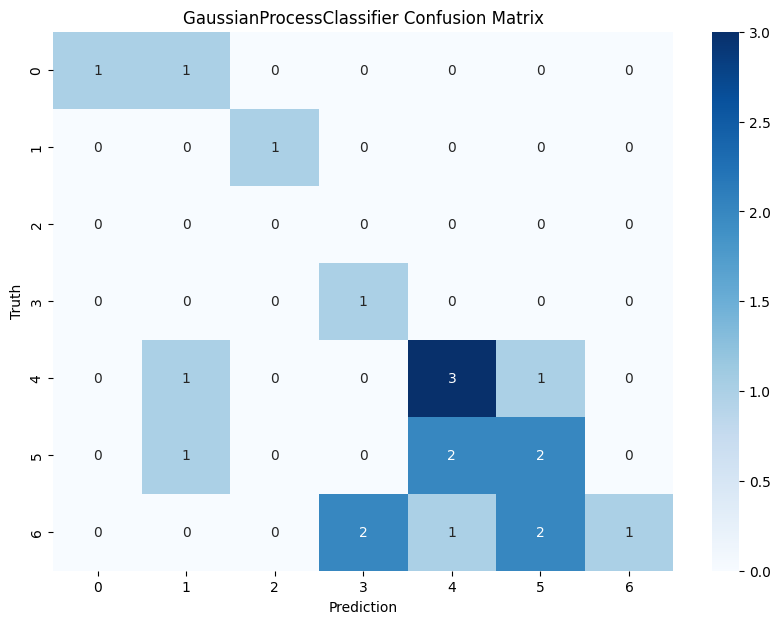

GaussianNB classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.17      1.00      0.29         1
       28-28       0.67      0.80      0.73         5
         DAP       1.00      0.60      0.75         5
        Urea       1.00      0.17      0.29         6

    accuracy                           0.50        20
   macro avg       0.55      0.44      0.39        20
weighted avg       0.82      0.50      0.54        20



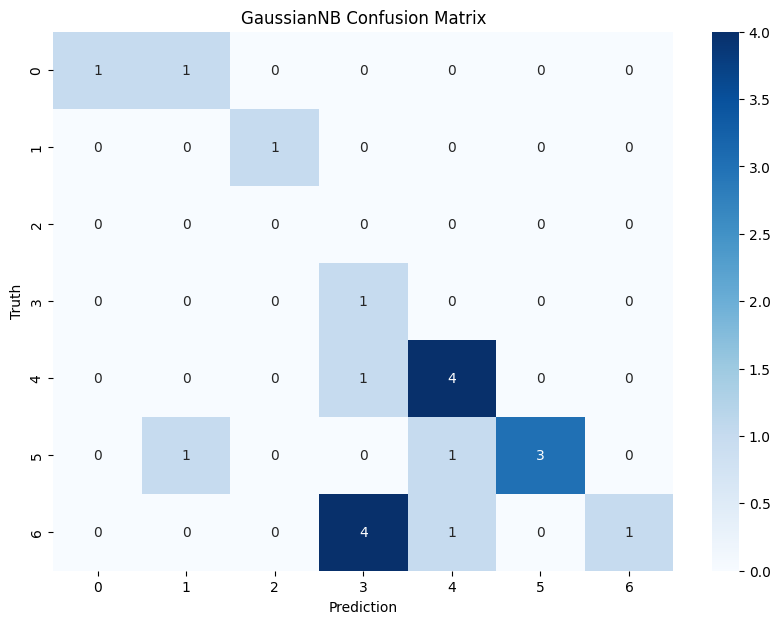

VotingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      0.80      0.89         5
         DAP       0.83      1.00      0.91         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.89      0.88      0.86        20
weighted avg       0.93      0.90      0.90        20



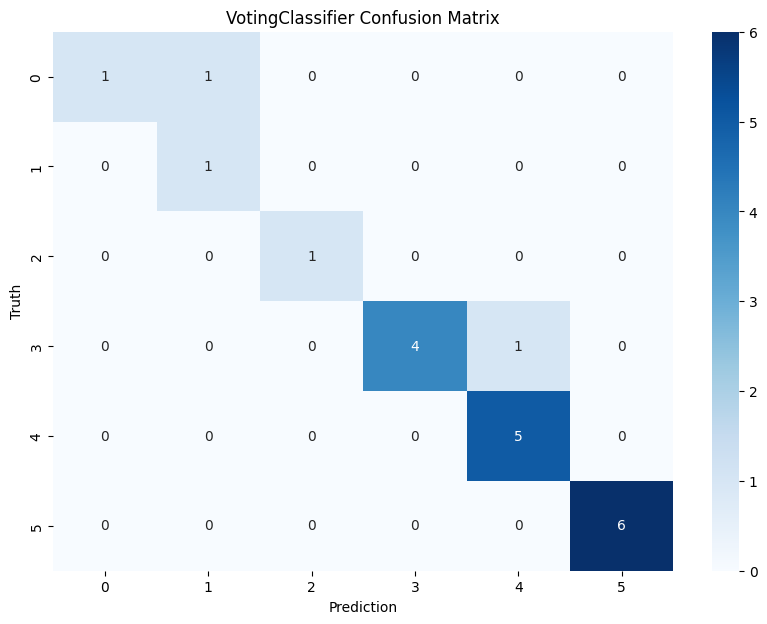

StackingClassifier classification report
              precision    recall  f1-score   support

    10-26-26       0.67      1.00      0.80         2
    14-35-14       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         1
       28-28       1.00      0.40      0.57         5
         DAP       0.71      1.00      0.83         5
        Urea       1.00      1.00      1.00         6

    accuracy                           0.85        20
   macro avg       0.90      0.90      0.87        20
weighted avg       0.90      0.85      0.83        20



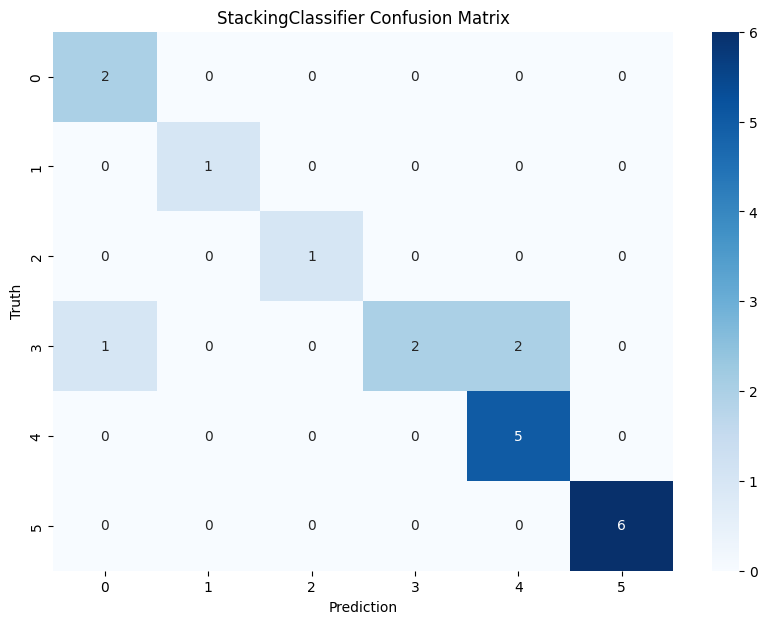

BaggingClassifier_SVC classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.20      1.00      0.33         1
       28-28       0.60      0.60      0.60         5
         DAP       0.00      0.00      0.00         5
        Urea       1.00      0.33      0.50         6

    accuracy                           0.35        20
   macro avg       0.40      0.35      0.30        20
weighted avg       0.56      0.35      0.38        20



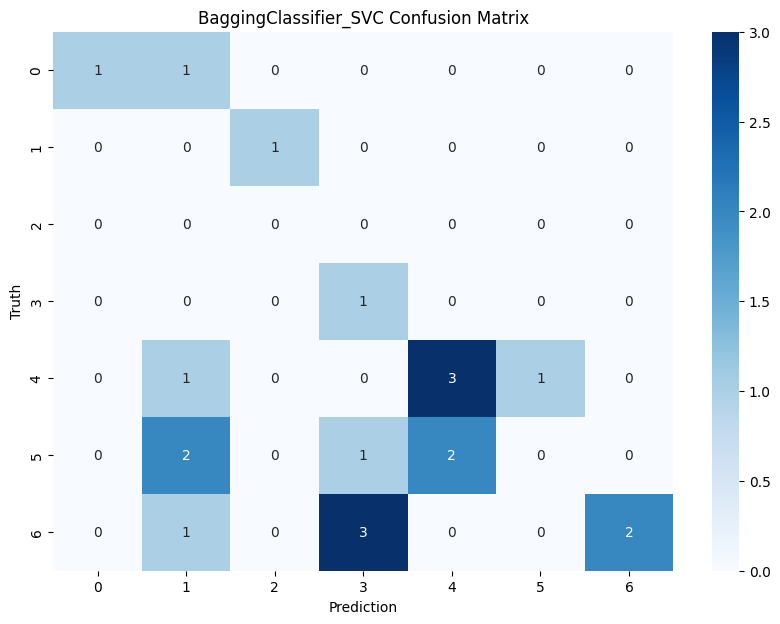

MLPClassifier classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       0.50      1.00      0.67         1
       28-28       0.50      0.60      0.55         5
         DAP       0.60      0.60      0.60         5
        Urea       1.00      0.67      0.80         6

    accuracy                           0.60        20
   macro avg       0.51      0.48      0.47        20
weighted avg       0.70      0.60      0.63        20



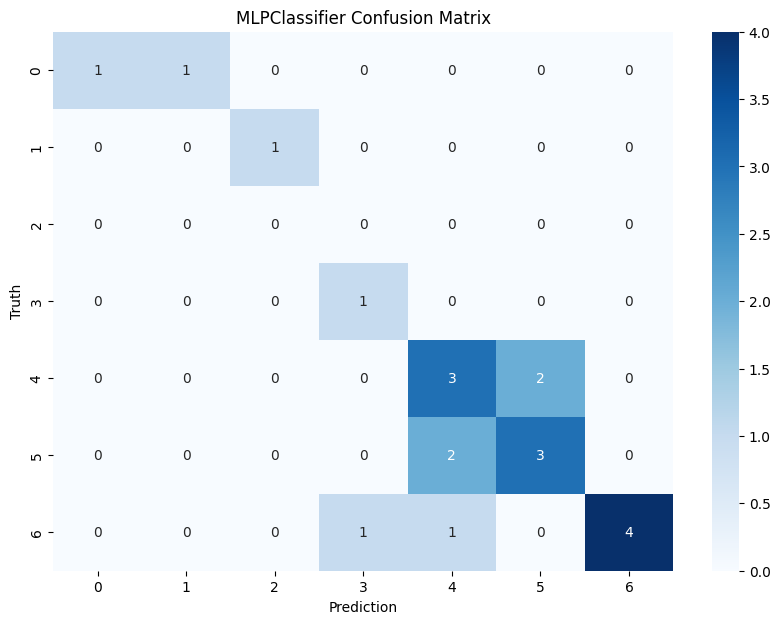

LinearSVC classification report
              precision    recall  f1-score   support

    10-26-26       1.00      0.50      0.67         2
    14-35-14       0.00      0.00      0.00         1
    17-17-17       0.00      0.00      0.00         0
       20-20       1.00      1.00      1.00         1
       28-28       1.00      0.60      0.75         5
         DAP       0.83      1.00      0.91         5
        Urea       0.86      1.00      0.92         6

    accuracy                           0.80        20
   macro avg       0.67      0.59      0.61        20
weighted avg       0.87      0.80      0.81        20



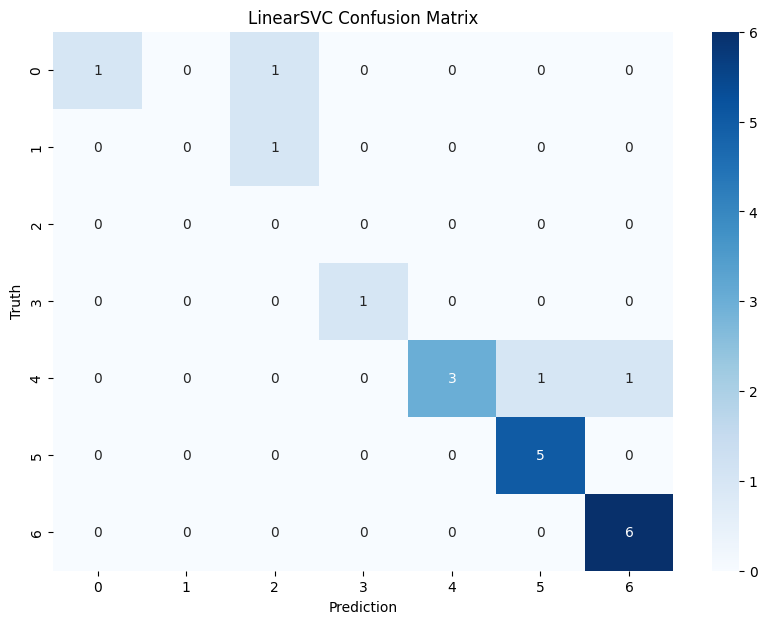

All files saved and zipped in all_models.zip


In [37]:
models = {
    "ExtraTreesClassifier": ExtraTreesClassifier(),
    "LinearDiscriminantAnalysis": LinearDiscriminantAnalysis(),
    "QuadraticDiscriminantAnalysis": QuadraticDiscriminantAnalysis(),
    "RidgeClassifier": RidgeClassifier(),
    "PassiveAggressiveClassifier": PassiveAggressiveClassifier(),
    "Perceptron": Perceptron(),
    "BaggingClassifier": BaggingClassifier(),
    "HistGradientBoostingClassifier": HistGradientBoostingClassifier(),
    "SGDClassifier": SGDClassifier(),
    "NearestCentroid": NearestCentroid(),
    "K-NeighborsClassifier": KNeighborsClassifier(n_neighbors=5, metric='euclidean'),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "RandomForestClassifier": RandomForestClassifier(n_estimators= 100, criterion = 'gini' , random_state= 42),
    "LogisticRegression": LogisticRegression(solver='liblinear',max_iter=1000),
    "SupportVectorClassifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "CatBoostClassifier": CatBoostClassifier(verbose=0),
    "ExtraTreeClassifier": ExtraTreeClassifier(),
    "LabelPropagation": LabelPropagation(),
    "LabelSpreading": LabelSpreading(),
    "GaussianProcessClassifier": GaussianProcessClassifier(),
    "GaussianNB": GaussianNB(),
    "VotingClassifier": VotingClassifier(estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('svc', SVC())
    ], voting='hard'),
    "StackingClassifier": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('svc', SVC())
        ], final_estimator=LogisticRegression()
    ),
    "BaggingClassifier_SVC": BaggingClassifier(estimator=SVC(), n_estimators=10),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "LinearSVC": LinearSVC(max_iter=10000),

}

if not os.path.exists('all_models'):
    os.makedirs('all_models')

accuracies = {}
for model_name, model in models.items():
    acc = evaluate_and_save_model(model, model_name)
    accuracies[model_name] = acc


zip_path = 'all_models.zip'
with zipfile.ZipFile(zip_path, 'w') as zipf:
    for root, dirs, files in os.walk("/kaggle/working/all_models"):
        for file in files:
            zipf.write(os.path.join(root, file),
                       arcname=os.path.relpath(os.path.join(root, file),
                                              "/content/all_models"))
print(f"All files saved and zipped in {zip_path}")

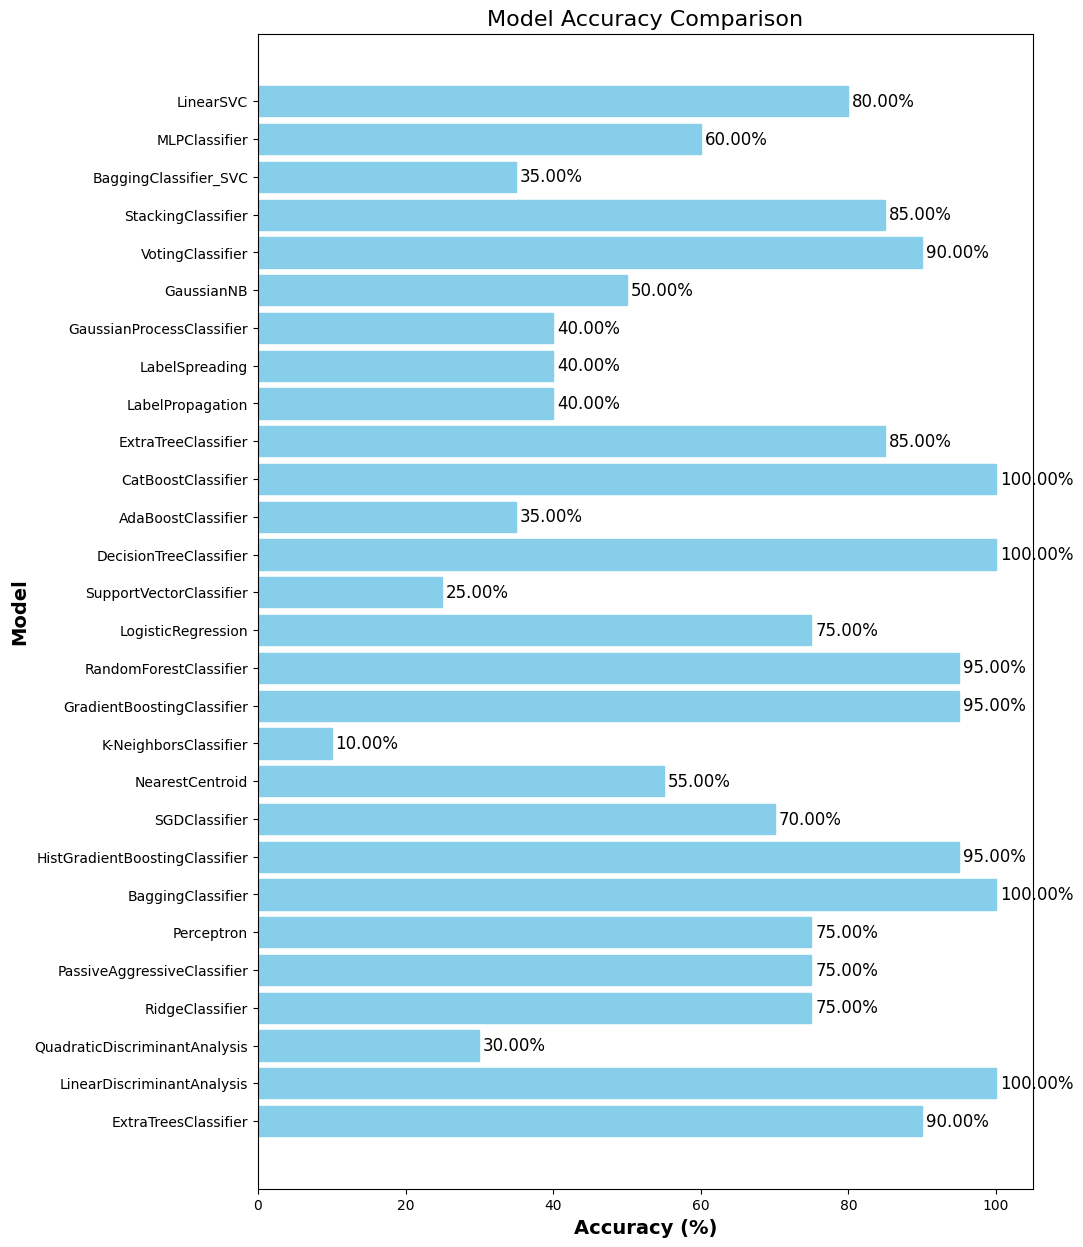

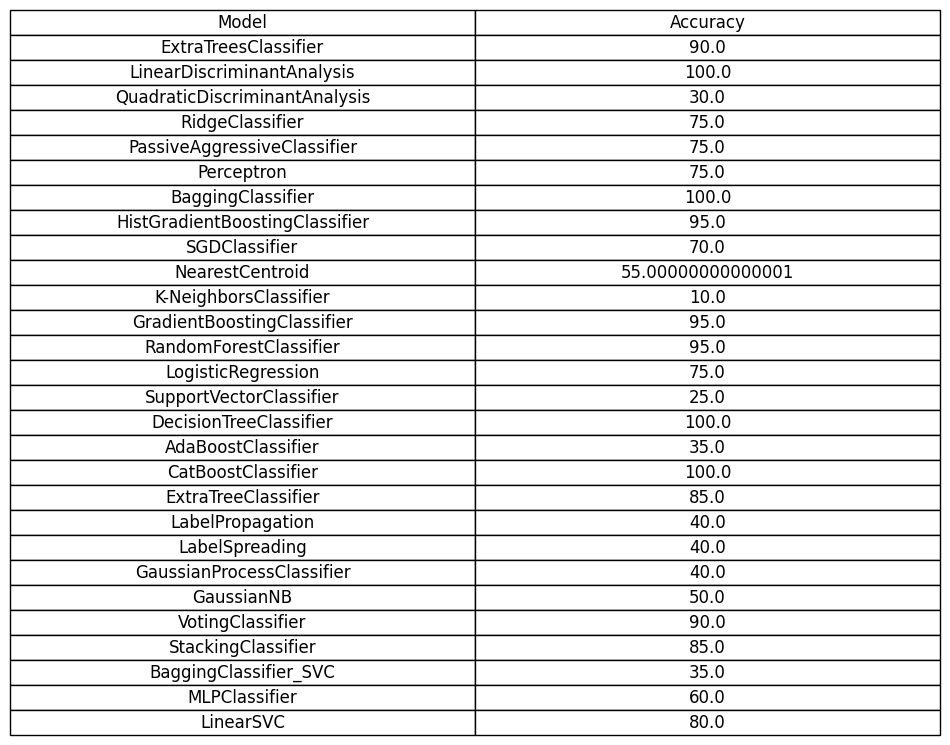

The best model is LinearDiscriminantAnalysis with an accuracy of 100.00%


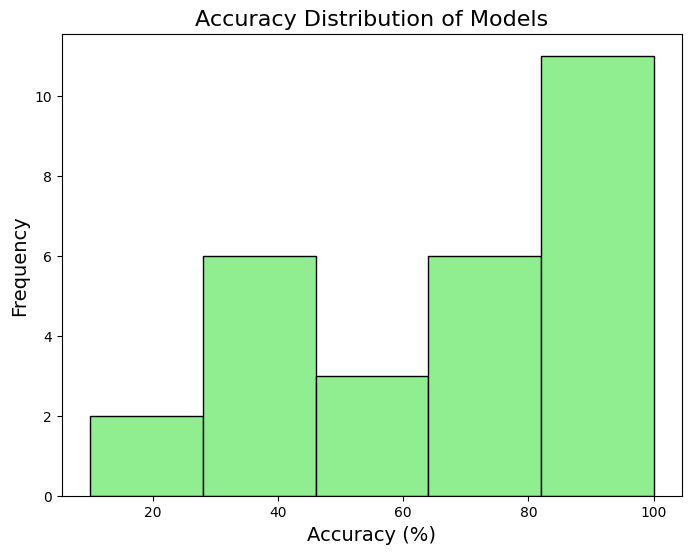

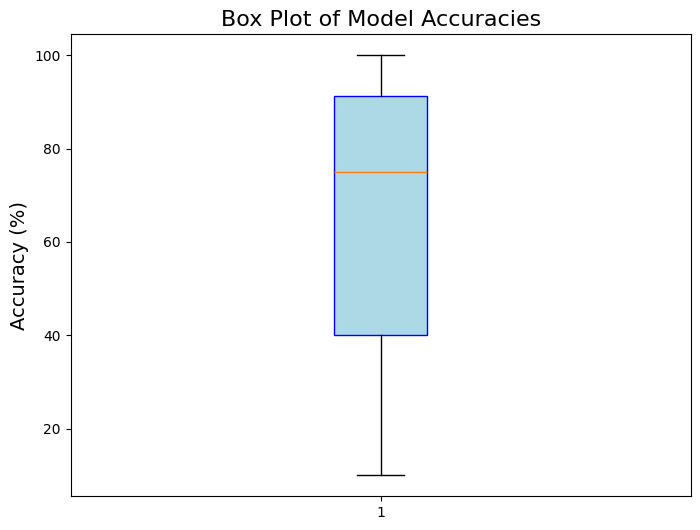

Top 5 models based on accuracy:
                         Model  Accuracy
17          CatBoostClassifier     100.0
6            BaggingClassifier     100.0
15      DecisionTreeClassifier     100.0
1   LinearDiscriminantAnalysis     100.0
11  GradientBoostingClassifier      95.0


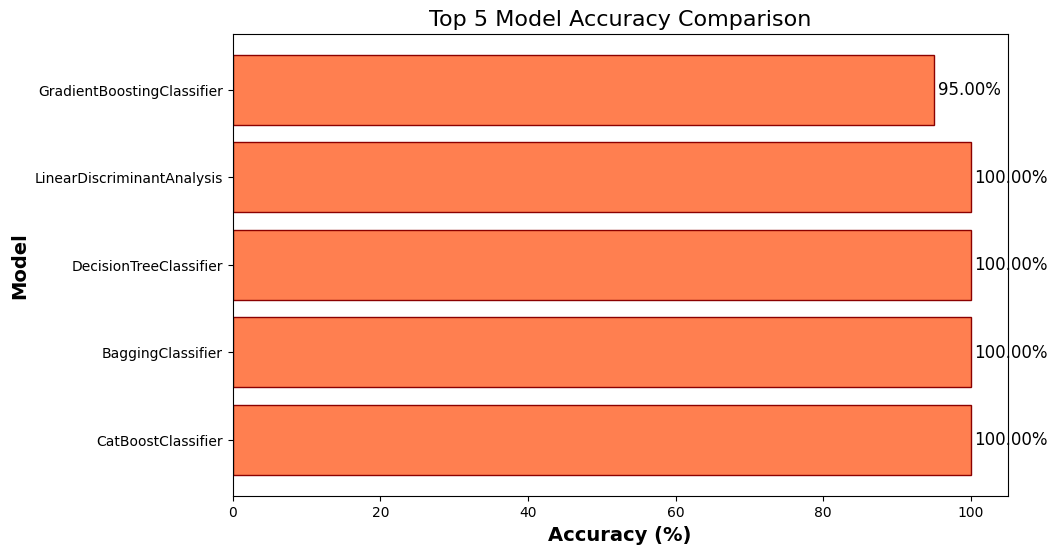

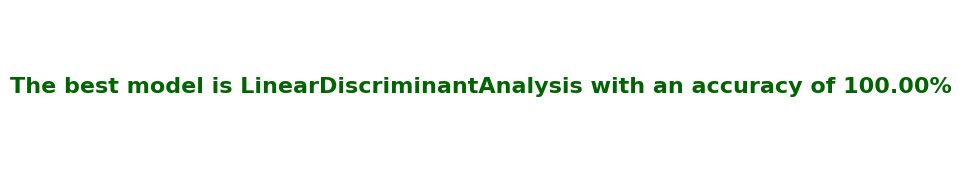

In [38]:
model_comparison_table = pd.DataFrame(list(accuracies.items()), columns=['Model', 'Accuracy'])
model_comparison_table['Accuracy'] = model_comparison_table['Accuracy'] * 100

model_comparison_table.to_csv("Model_Accuracy_Comparison.csv", index=False)

fig, ax = plt.subplots(figsize=(10, 15))
bars = ax.barh(model_comparison_table['Model'], model_comparison_table['Accuracy'], color='skyblue', edgecolor='skyblue')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Model Accuracy Comparison', fontsize=16)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

plt.savefig("Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
table_data = model_comparison_table.values
table = ax.table(cellText=table_data, colLabels=model_comparison_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)

plt.savefig("Model_Accuracy_Comparison_Table.png", bbox_inches='tight')
plt.show()

best_model_name = model_comparison_table.loc[model_comparison_table['Accuracy'].idxmax(), 'Model']
best_model_accuracy = model_comparison_table['Accuracy'].max()
print(f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%")

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(model_comparison_table['Accuracy'], bins=5, color='lightgreen', edgecolor='black')
ax.set_title("Accuracy Distribution of Models", fontsize=16)
ax.set_xlabel("Accuracy (%)", fontsize=14)
ax.set_ylabel("Frequency", fontsize=14)

plt.savefig("Model_Accuracy_Distribution.png", bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(model_comparison_table['Accuracy'], patch_artist=True, boxprops=dict(facecolor='lightblue', color='blue'))
ax.set_title("Box Plot of Model Accuracies", fontsize=16)
ax.set_ylabel("Accuracy (%)", fontsize=14)

plt.savefig("Model_Accuracy_BoxPlot.png", bbox_inches='tight')
plt.show()

top_five_models = model_comparison_table.sort_values(by='Accuracy', ascending=False).head(5)
print("Top 5 models based on accuracy:")
print(top_five_models)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(top_five_models['Model'], top_five_models['Accuracy'], color='coral', edgecolor='darkred')
ax.set_xlabel('Accuracy (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Model', fontsize=14, fontweight='bold')
ax.set_title('Top 5 Model Accuracy Comparison', fontsize=16)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2, f"{width:.2f}%", ha='left', va='center', fontsize=12)

plt.savefig("Top_5_Model_Accuracy_Comparison_BarChart.png", bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(figsize=(10, 2))
ax.text(0.5, 0.5, f"The best model is {best_model_name} with an accuracy of {best_model_accuracy:.2f}%",
        ha='center', va='center', fontsize=16, fontweight='bold', color='darkgreen')
ax.axis('off')

plt.savefig("Model_Final_Decision.png", bbox_inches='tight')
plt.show()